In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling 
import scipy.stats as stats
import sklearn as sk
import statsmodels as sm
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#!pip install scipy==1.2 --upgrade

In [5]:
import statsmodels.formula.api as smf

In [6]:
cars = pd.read_csv('Car_sales.csv')

In [7]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [8]:
#cars.profile_report()

In [9]:
cars.isnull().sum()

Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

In [10]:
cars.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [11]:
# seperate categorical and continuous variables
cars_conti_vars = cars.select_dtypes(include=['float64','int64'])
cars_cat_vars = cars.select_dtypes(include=['object'])


In [12]:
cars_cat_vars.head()

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [13]:
cars_conti_vars.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,53.00,68.03,0.11,14.11,29.45,67.96,540.56
four_year_resale_value,121.0,18.07,11.45,5.16,11.26,14.18,19.88,67.55
Price_in_thousands,155.0,27.39,14.35,9.24,18.02,22.80,31.95,85.50
Engine_size,156.0,3.06,1.04,1.00,2.30,3.00,3.58,8.00
Horsepower,156.0,185.95,56.70,55.00,149.50,177.50,215.00,450.00
Wheelbase,156.0,107.49,7.64,92.60,103.00,107.00,112.20,138.70
Width,156.0,71.15,3.45,62.60,68.40,70.55,73.43,79.90
Length,156.0,187.34,13.43,149.40,177.58,187.90,196.12,224.50
Curb_weight,155.0,3.38,0.63,1.90,2.97,3.34,3.80,5.57
Fuel_capacity,156.0,17.95,3.89,10.30,15.80,17.20,19.58,32.00


In [14]:
cars_cat_vars.describe().T.round(2)

,count,unique,top,freq
Manufacturer,157,30,Dodge,11
Model,157,156,Neon,2
Vehicle_type,157,2,Passenger,116
Latest_Launch,157,130,1/29/2012,2


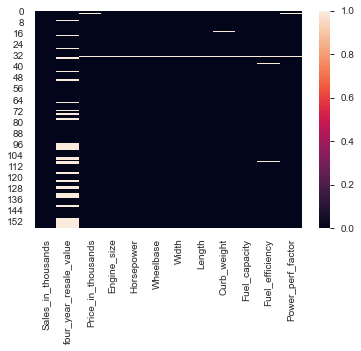

In [15]:
sns.heatmap(cars_conti_vars.isnull())

In [16]:
# Missing value treatment 
def missing_imputation(x):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) 
    else:
        x = x.fillna(x.mode())
    return x

In [17]:
cars_conti_vars=cars_conti_vars.apply(missing_imputation)
cars_cat_vars = cars_cat_vars.apply(missing_imputation)

In [18]:
cars_conti_vars.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


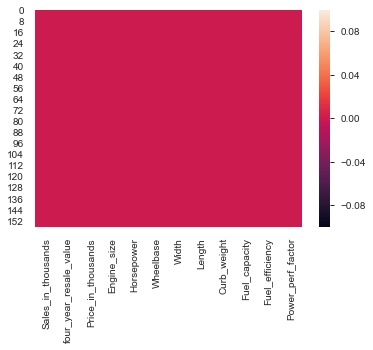

In [19]:
sns.heatmap(cars_conti_vars.isnull())

In [20]:
# Outlier Treatment 
cars.quantile(0.01)

Sales_in_thousands          0.93728
four_year_resale_value      6.17300
Price_in_thousands         10.23144
Engine_size                 1.55500
Horsepower                 96.40000
Wheelbase                  92.87500
Width                      66.08500
Length                    154.91500
Curb_weight                 2.24540
Fuel_capacity              11.90000
Fuel_efficiency            15.00000
Power_perf_factor          38.46192
Name: 0.01, dtype: float64

In [21]:
cars.quantile(0.99)

Sales_in_thousands        260.645320
four_year_resale_value     60.220000
Price_in_thousands         78.479800
Engine_size                 5.700000
Horsepower                325.750000
Wheelbase                 134.375000
Width                      79.190000
Length                    219.305000
Curb_weight                 5.396680
Fuel_capacity              30.900000
Fuel_efficiency            33.000000
Power_perf_factor         141.119461
Name: 0.99, dtype: float64

In [22]:
cars_conti_vars = cars_conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [23]:
cars_conti_vars.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,51.12,57.72,0.94,14.11,29.45,67.96,260.65
four_year_resale_value,157.0,18.03,9.76,6.74,12.54,17.71,18.14,59.49
Price_in_thousands,157.0,27.33,13.97,10.25,18.14,23.40,31.93,78.33
Engine_size,157.0,3.05,0.98,1.56,2.30,3.00,3.50,5.70
Horsepower,157.0,185.32,52.63,96.48,150.00,180.00,215.00,325.40
Wheelbase,157.0,107.44,7.40,92.88,103.00,107.00,112.20,134.30
Width,157.0,71.17,3.38,66.09,68.40,70.60,73.40,79.19
Length,157.0,187.33,13.07,154.97,177.60,187.80,196.10,219.22
Curb_weight,157.0,3.38,0.62,2.25,2.98,3.37,3.78,5.40
Fuel_capacity,157.0,17.95,3.81,11.90,15.80,17.20,19.50,30.88


In [24]:
cars_cat_vars

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011
...,...,...,...,...
152,Volvo,V40,Passenger,9/21/2011
153,Volvo,S70,Passenger,11/24/2012
154,Volvo,V70,Passenger,6/25/2011
155,Volvo,C70,Passenger,4/26/2011


In [25]:
cars_cat_vars.Manufacturer.value_counts()

Dodge         11
Ford          11
Mercedes-B     9
Toyota         9
Chevrolet      9
Chrysler       7
Nissan         7
Mitsubishi     7
Oldsmobile     6
Lexus          6
Mercury        6
Volkswagen     6
Volvo          6
Pontiac        6
Cadillac       5
Saturn         5
Honda          5
Plymouth       4
Buick          4
Acura          4
Audi           3
Jeep           3
BMW            3
Hyundai        3
Lincoln        3
Porsche        3
Saab           2
Subaru         2
Infiniti       1
Jaguar         1
Name: Manufacturer, dtype: int64

In [26]:
cars_cat_vars = cars[['Manufacturer', 'Vehicle_type']]



In [27]:
Manufacturer_dummies = pd.get_dummies(cars_cat_vars.Manufacturer,drop_first=True)

In [28]:
Vehicle_dummies = pd.get_dummies(cars_cat_vars.Vehicle_type,drop_first=True)

In [29]:
cars_new = pd.concat([cars_conti_vars,Manufacturer_dummies,Vehicle_dummies],axis=1)

In [30]:
cars_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Plymouth,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo,Passenger
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,...,0,0,0,0,0,0,0,0,1,1
153,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,...,0,0,0,0,0,0,0,0,1,1
154,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,...,0,0,0,0,0,0,0,0,1,1
155,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,...,0,0,0,0,0,0,0,0,1,1


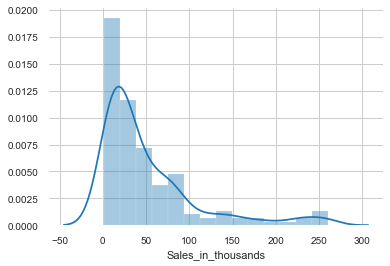

In [31]:
#assumption check 
#distribution of variables 

sns.distplot(cars_new.Sales_in_thousands)


In [119]:
# this distribution is highly skewed 
# apply log transformation to make the distribution normal 
cars_new['ln_sales_in_thousands']=np.log10(cars_new.Sales_in_thousands)

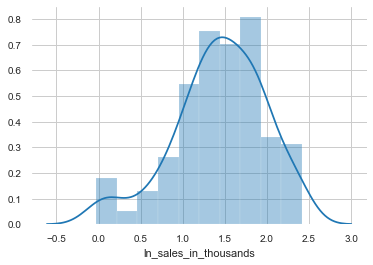

In [33]:
sns.distplot(cars_new.ln_sales_in_thousands)

In [34]:
# Linearity: correlation matrix (ranges from 1 to -1)
corrm = cars_new.corr()
corrm.to_csv('corrm.csv')
corrm

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo,Passenger,ln_sales_in_thousands
Sales_in_thousands,1.000000,-0.308861,-0.361669,-0.014344,-0.259321,0.277976,0.093039,0.200763,-0.035276,0.044488,...,0.036853,-0.114192,-0.079886,-0.054683,-0.021816,0.133404,-0.056294,-0.133361,-0.230252,0.799513
four_year_resale_value,-0.308861,1.000000,0.832929,0.440995,0.679835,-0.037094,0.158198,0.024869,0.305357,0.285000,...,-0.071682,0.507672,0.000501,-0.087353,0.000501,-0.030809,-0.062785,0.000880,0.076763,-0.479862
Price_in_thousands,-0.361669,0.832929,1.000000,0.618254,0.849997,0.118256,0.328192,0.158248,0.527298,0.431118,...,-0.062697,0.352357,0.018621,-0.170104,-0.048409,-0.094678,-0.137881,0.051626,0.041925,-0.578173
Engine_size,-0.014344,0.440995,0.618254,1.000000,0.814956,0.518423,0.702594,0.576349,0.793911,0.698435,...,0.078263,0.016663,-0.104766,-0.191434,-0.064030,-0.108122,-0.221292,-0.153211,-0.279388,-0.120947
Horsepower,-0.259321,0.679835,0.849997,0.814956,1.000000,0.325460,0.538112,0.420603,0.637946,0.526769,...,-0.001227,0.231472,-0.016937,-0.227200,-0.044001,-0.115890,-0.245022,-0.011992,-0.012080,-0.400462
Wheelbase,0.277976,-0.037094,0.118256,0.518423,0.325460,1.000000,0.681398,0.837519,0.657238,0.659819,...,0.046339,-0.260900,-0.045232,-0.083535,-0.092220,-0.094106,-0.203736,-0.085683,-0.383122,0.270114
Width,0.093039,0.158198,0.328192,0.702594,0.538112,0.681398,1.000000,0.700086,0.710550,0.648529,...,0.042243,-0.060888,-0.073160,-0.200807,-0.110254,-0.115712,-0.187561,-0.094850,-0.241395,0.038288
Length,0.200763,0.024869,0.158248,0.576349,0.420603,0.837519,0.700086,1.000000,0.622791,0.561929,...,0.096631,-0.149931,-0.014230,-0.061410,-0.059555,-0.103638,-0.304631,-0.059132,-0.129636,0.207158
Curb_weight,-0.035276,0.305357,0.527298,0.793911,0.637946,0.657238,0.710550,0.622791,1.000000,0.868232,...,0.007667,-0.094626,-0.045038,-0.221474,-0.020134,-0.070763,-0.161958,-0.030585,-0.519394,-0.051903
Fuel_capacity,0.044488,0.285000,0.431118,0.698435,0.526769,0.659819,0.648529,0.561929,0.868232,1.000000,...,-0.001638,-0.034864,-0.007419,-0.260390,-0.046335,-0.011774,-0.170616,-0.006016,-0.594792,-0.019541


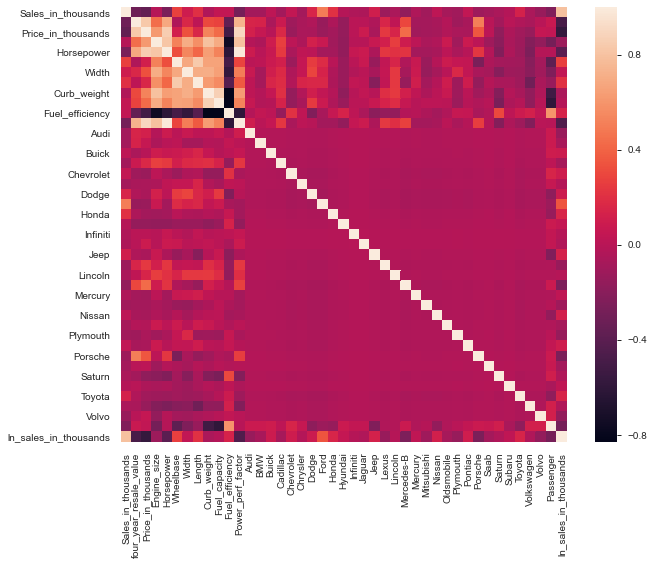

In [35]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cars_new.corr())

In [36]:
#dropping the variables based lowcorrelation with Y
cars_new.drop(['four_year_resale_value','Power_perf_factor','BMW','Buick','Jeep',
'Cadillac','Chevrolet','Chrysler','Hyundai',
'Infiniti','Jaguar','Lincoln','Mercury',
'Oldsmobile','Pontiac','Saab','Saturn',
'Subaru','Volkswagen','Mercedes-B'],axis=1,inplace=True)

In [37]:
cars_new.shape

(157, 23)

In [38]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
#cars_new.columns
feature_columns = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])
feature_columns

Index(['Audi', 'Curb_weight', 'Dodge', 'Engine_size', 'Ford', 'Fuel_capacity',
       'Fuel_efficiency', 'Honda', 'Horsepower', 'Length', 'Lexus',
       'Mitsubishi', 'Nissan', 'Passenger', 'Plymouth', 'Porsche',
       'Price_in_thousands', 'Toyota', 'Volvo', 'Wheelbase', 'Width'],
      dtype='object')

In [39]:
# divide the data into training and testing and separate out Y and X variables
train, test = train_test_split(cars_new, test_size = 0.3, random_state = 12345)

In [40]:
test.shape

(48, 23)

In [41]:
train.shape

(109, 23)

In [124]:
# build a ols model
lm1 = smf.ols('''ln_sales_in_thousands ~ Curb_weight+ Engine_size+ Fuel_capacity+ 
              Fuel_efficiency+Horsepower+ Length+ Audi+ Dodge+Ford+ Honda+ 
              Lexus+Mitsubishi+ Nissan+Plymouth+ Porsche+ Toyota+Volvo+ Price_in_thousands+
              Passenger+Wheelbase+ Width''', train).fit()

In [123]:
# summary of the model
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.643
Model:                               OLS   Adj. R-squared:                  0.557
Method:                    Least Squares   F-statistic:                     7.454
Date:                   Tue, 13 Oct 2020   Prob (F-statistic):           5.74e-12
Time:                           08:30:13   Log-Likelihood:                -33.502
No. Observations:                    109   AIC:                             111.0
Df Residuals:                         87   BIC:                             170.2
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

In [44]:
# predict the sales on the training data
train['pred_sales'] = np.exp(lm1.predict(train))
train.head()

C:\Users\Ashish kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Lexus,Mitsubishi,Nissan,Plymouth,Porsche,Toyota,Volvo,Passenger,ln_sales_in_thousands,pred_sales
54,125.33800,36.135,4.6,240.0,119.0,78.7,204.6,4.808,26.0,16.0,...,0,0,0,0,0,0,0,0,2.098083,8.367144
52,260.64532,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,...,0,0,0,0,0,0,0,0,2.416050,7.036533
141,65.11900,22.368,3.0,194.0,114.2,73.4,193.5,3.759,20.9,22.0,...,0,0,0,0,0,1,0,0,1.813708,7.474613
8,9.23100,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,...,0,0,0,0,0,0,0,1,0.965249,3.028669
131,5.22300,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,...,0,0,0,0,0,0,0,1,0.717920,5.055086


In [45]:
#predict the sales on the testing data
test['pred_sales'] = np.exp(lm1.predict(test))
test.head()

C:\Users\Ashish kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Lexus,Mitsubishi,Nissan,Plymouth,Porsche,Toyota,Volvo,Passenger,ln_sales_in_thousands,pred_sales
70,24.07200,31.505,3.0,210.0,105.1,70.5,190.200,3.373,18.50,23.0,...,1,0,0,0,0,0,0,1,1.381512,3.218849
42,31.03800,18.575,3.9,175.0,127.2,78.8,208.500,4.298,30.88,16.0,...,0,0,0,0,0,0,0,0,1.491894,6.689827
56,260.64532,26.935,4.6,220.0,134.3,79.1,219.216,4.241,25.10,18.0,...,0,0,0,0,0,0,0,0,2.416050,14.718210
35,76.03400,12.640,2.0,132.0,105.0,74.4,174.400,2.567,12.50,29.0,...,0,0,0,0,0,0,0,1,1.881008,6.557530
16,6.53600,39.665,4.6,275.0,108.0,75.5,200.600,3.843,19.00,22.0,...,0,0,0,0,0,0,0,1,0.815312,3.120393


In [125]:
#  accuracy metrics ( MAPE: Mean Absolute Percentage Error)
MAPE_train = np.mean(np.abs(train['Sales_in_thousands'] - train['pred_sales'])/train['Sales_in_thousands'])

MAPE_test = np.mean(np.abs(test['Sales_in_thousands'] - test['pred_sales'])/test['Sales_in_thousands'])

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.8098220776797849  |  MAPE of testing data:  0.7933351747523338


In [47]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(train['Sales_in_thousands'], train['pred_sales']))

MAE: 46.92181742583165


In [115]:
print('MSE:',mean_squared_error(train['Sales_in_thousands'], train['pred_sales']))

MSE: 5478.796567862837


In [116]:
# accuracy metrics ( Correlation)
Corr_train = stats.stats.pearsonr(train.Sales_in_thousands, train.pred_sales)
Corr_test = stats.stats.pearsonr(train.Sales_in_thousands, train.pred_sales)

In [117]:
# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.7465644287102935, 1.1853542418224523e-20)  |  Correlation of testing data:  (0.7465644287102935, 1.1853542418224523e-20)
